In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import tensorflow as tf
import random
import cv2
IMG_SIZE=32

In [4]:

training_data=[]
def train_data():
  # labeling diseases
  label_blight=[1.0,0.0,0.0,0.0]  #Blight
  label_cr=[0.0,1.0,0.0,0.0] #Common_Rust
  label_gls=[0.0,0.0,1.0,0.0] #Gray_Leaf_Spot
  label_h=[0.0,0.0,0.0,1.0] #healthy

  #path of images
  drive_path=[r'C:\Users\Dell\Desktop\Deep Learning\Tensorflow\CNN\plant_disease_detection\data\Blight',r'C:\Users\Dell\Desktop\Deep Learning\Tensorflow\CNN\plant_disease_detection\data\Common_Rust',r'C:\Users\Dell\Desktop\Deep Learning\Tensorflow\CNN\plant_disease_detection\data\Gray_Leaf_Spot',r'C:\Users\Dell\Desktop\Deep Learning\Tensorflow\CNN\plant_disease_detection\data\Healthy']

  #Collecting training data
  
  for img in tqdm(os.listdir(drive_path[0])): 
    path=os.path.join(drive_path[0],img) #joining path of image and plants folder
    img=cv2.imread(path,cv2.IMREAD_COLOR) #reading the image
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #resizing the image
    training_data.append([np.array(img),np.array(label_blight)]) #trainig data (image,label)
  
  
  for img in tqdm(os.listdir(drive_path[1])):
    path=os.path.join(drive_path[1],img)
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    training_data.append([np.array(img),np.array(label_cr)])
  
  for img in tqdm(os.listdir(drive_path[2])):
    path=os.path.join(drive_path[2],img)
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    training_data.append([np.array(img),np.array(label_gls)])    
    
  for img in tqdm(os.listdir(drive_path[3])):
    path=os.path.join(drive_path[3],img)
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    training_data.append([np.array(img),np.array(label_h)])   

train_data()

100%|██████████████████████████████████████████████████████████████████████████████| 1125/1125 [00:30<00:00, 37.09it/s]


In [5]:

testing_data=[]
def test_data():
  label_blight=[1.0,0.0,0.0,0.0]  #Blight
  label_cr=[0.0,1.0,0.0,0.0] #Common_Rust
  label_gls=[0.0,0.0,1.0,0.0] #Gray_Leaf_Spot
  label_h=[0.0,0.0,0.0,1.0] #healthy

  #path of images
  drive_path=[r'C:\Users\Dell\Desktop\Deep Learning\Tensorflow\CNN\plant_disease_detection\data_test\Blight',r'C:\Users\Dell\Desktop\Deep Learning\Tensorflow\CNN\plant_disease_detection\data_test\Common_Rust',r'C:\Users\Dell\Desktop\Deep Learning\Tensorflow\CNN\plant_disease_detection\data_test\Gray_Leaf_Spot',r'C:\Users\Dell\Desktop\Deep Learning\Tensorflow\CNN\plant_disease_detection\data_test\Healthy']


  #Collecting training data
  #
  for img in tqdm(os.listdir(drive_path[0])): 
    path=os.path.join(drive_path[0],img) #joining path of image and plant folder
    img=cv2.imread(path,cv2.IMREAD_COLOR) #reading the image
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #resizing the image
    testing_data.append([np.array(img),np.array(label_blight)]) #trainig data (image,label)
  
  #
  for img in tqdm(os.listdir(drive_path[1])):
    path=os.path.join(drive_path[1],img)
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    testing_data.append([np.array(img),np.array(label_cr)])
 
  for img in tqdm(os.listdir(drive_path[2])):
    path=os.path.join(drive_path[2],img)
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    testing_data.append([np.array(img),np.array(label_gls)])    
   
  for img in tqdm(os.listdir(drive_path[3])):
    path=os.path.join(drive_path[3],img)
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    testing_data.append([np.array(img),np.array(label_h)])   

test_data()

100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:01<00:00, 33.77it/s]


In [6]:
#shuffling the data
from random import shuffle
shuffle(training_data)
print("lenght of training data:",len(training_data))
shuffle(testing_data)
print("length of testing data:",len(testing_data))

lenght of training data: 4047
length of testing data: 141


In [7]:
# definging the independent and dependant variable

#training data
X_train=np.array([i[0] for i in training_data])
Y_train=np.array([i[1] for i in training_data])

#testing data
X_test=np.array([i[0] for i in testing_data])
Y_test=np.array([i[1] for i in testing_data])

In [8]:
print("Shape of X_train:",X_train.shape,"\nShape of Y_train:",Y_train.shape)
print("Shape of X_test:",X_test.shape,"\nShape of Y_test:",Y_test.shape)

Shape of X_train: (4047, 32, 32, 3) 
Shape of Y_train: (4047, 4)
Shape of X_test: (141, 32, 32, 3) 
Shape of Y_test: (141, 4)


**Convolution neural network model**

creating a base CNN model: The input layer of shape 200*200 following with the zero-padding, Then a 2D convolution network layer and a Batch Normalization layer of momentum 0.99 and epsilon 0.001, following with the relu Activation Layer and Pooling, Finnaly a Flatten layer and a Dense layer of Softmax Activation function.

In [9]:
#cnn model

def cnn_model():
  model=tf.keras.Sequential([tf.keras.layers.InputLayer((IMG_SIZE,IMG_SIZE,3)),
                             
                             tf.keras.layers.ZeroPadding2D(padding=(3,3)),

                             tf.keras.layers.Conv2D(filters=32,kernel_size=7,strides=(1,1)),

                             tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones'),

                             tf.keras.layers.ReLU(),

                             tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'),

                             tf.keras.layers.Flatten(),

                             tf.keras.layers.Dense(4,activation='softmax'),                             
                             
                             ])
  return model

conv_model=cnn_model() #calling the model
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy']) #compliing the model

history=conv_model.fit(x=X_train,y=Y_train,epochs=50,validation_data=(X_test,Y_test),batch_size=32) #fitting the CNN model

Epoch 1/50
127/127 [==============================] - 14s 69ms/step - loss: 0.6083 - accuracy: 0.7845 - val_loss: 2.4641 - val_accuracy: 0.4823
Epoch 2/50
127/127 [==============================] - 7s 55ms/step - loss: 0.4052 - accuracy: 0.8436 - val_loss: 1.5812 - val_accuracy: 0.5106
Epoch 3/50
127/127 [==============================] - 7s 57ms/step - loss: 0.3473 - accuracy: 0.8720 - val_loss: 1.5605 - val_accuracy: 0.5532
Epoch 4/50
127/127 [==============================] - 7s 54ms/step - loss: 0.3453 - accuracy: 0.8693 - val_loss: 2.1393 - val_accuracy: 0.4752
Epoch 5/50
127/127 [==============================] - 6s 51ms/step - loss: 0.2601 - accuracy: 0.8979 - val_loss: 3.1193 - val_accuracy: 0.4610
Epoch 6/50
127/127 [==============================] - 7s 53ms/step - loss: 0.2317 - accuracy: 0.9066 - val_loss: 1.6724 - val_accuracy: 0.5106
Epoch 7/50
127/127 [==============================] - 8s 60ms/step - loss: 0.2002 - accuracy: 0.9232 - val_loss: 2.0942 - val_accuracy: 0.531

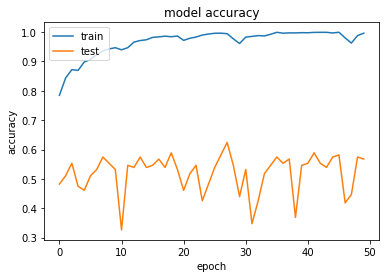

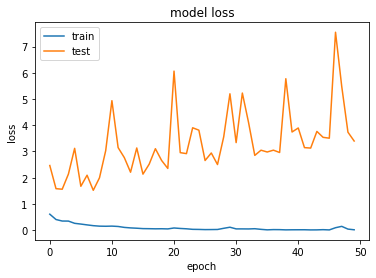

In [10]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
conv_model.save('convolution_model.h5') #Saving the CNN model
conv_model.evaluate(X_test,Y_test) #Evaluating the CNN model

5/5 [==============================] - 0s 15ms/step - loss: 3.3980 - accuracy: 0.5674


[3.398001194000244, 0.567375898361206]

In [12]:
# Defining the process function for processing the imaes while testing 
def process(path):
  img=cv2.imread(path,cv2.IMREAD_COLOR)
  img=cv2.resize(img,(32,32))
  x=img
  img=np.expand_dims(img,axis=0)
  return img,x
def pred_list(pred):
  pred_list=[]
  for i in pred[0]:
    x=format(i,'.8f')
    pred_list.append(x)
  return pred_list


 
def disease(pred_list):
  x=np.argmax(pred_list)
  if x==0:
    print("Disease: Blight")
  elif x==1:
    print("Disease: Common_Rust ")
  elif x==2:
    print("Disease: Gray_Leaf_Spot ")
  elif x==3:
    print("Healthy")

1/1 [==============================] - 0s 150ms/step
['0.99570364', '0.00000000', '0.00429641', '0.00000000']
Disease: Blight


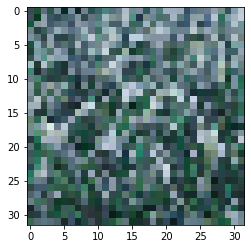

In [15]:
path=r'Corn_Blight1111.jpg'
img,x=process(path)
pred=conv_model.predict(img)
pred=pred_list(pred)
print(pred)
disease(pred)
plt.imshow(x)

1/1 [==============================] - 0s 27ms/step
['0.03578641', '0.96156573', '0.00264790', '0.00000000']
Disease: Common_Rust 


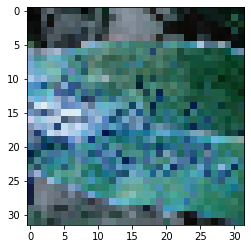

In [16]:
path=r'Corn_Common_Rust1273.jpg'
img,x=process(path)
pred=conv_model.predict(img)
pred=pred_list(pred)
print(pred)
disease(pred)
plt.imshow(x)

1/1 [==============================] - 0s 27ms/step
['0.00040169', '0.00006502', '0.99953330', '0.00000000']
Disease: Gray_Leaf_Spot 


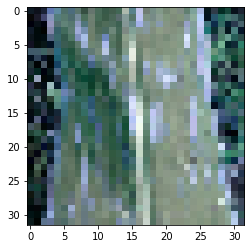

In [17]:
path=r'Corn_Gray_Spot2.jpg'
img,x=process(path)
pred=conv_model.predict(img)
pred=pred_list(pred)
print(pred)
disease(pred)
plt.imshow(x)

1/1 [==============================] - 0s 28ms/step
['0.00000141', '0.00000010', '0.00000000', '0.99999845']
Healthy


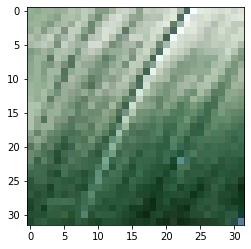

In [18]:
path=r'Corn_Health24.jpg'
img,x=process(path)
pred=conv_model.predict(img)
pred=pred_list(pred)
print(pred)
disease(pred)
plt.imshow(x)